# Supervised Learning: Support Vector Machines: SVMs

# GridSearchCV: load_digits

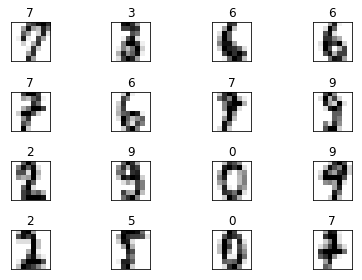

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits
digits = load_digits()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, stratify=digits.target, random_state=0)

fig, axes = plt.subplots(4, 4)
for x, y, ax in zip(X_train, y_train, axes.ravel()):
    ax.set_title(y)
    ax.imshow(x.reshape(8, 8), cmap="gray_r")
    ax.set_xticks(())
    ax.set_yticks(())
plt.tight_layout()

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
scaled_svc = make_pipeline(StandardScaler(), SVC())

from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(SVC(), X_train, y_train, cv=10)))
print(np.mean(cross_val_score(scaled_svc, X_train, y_train, cv=10)))

C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

0.5782822352987651


C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

0.9784508061691609


In [3]:
# X_train.std() is also good for global scaling - if the features were on the same scale.
# this dataset is very atypical.
print(np.mean(cross_val_score(SVC(gamma=(1. / (X_train.shape[1] * X_train.var()))), X_train, y_train, cv=10)))

0.9864804109275003


In [4]:
np.set_printoptions(precision=6, suppress=True)
# using pipeline of scaler and SVC. Could also use SVC and rescale gamma
param_grid = {'svc__C': np.logspace(-3, 2, 6),
              'svc__gamma': np.logspace(-3, 2, 6) / X_train.shape[0]}
param_grid

{'svc__C': array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ]),
 'svc__gamma': array([0.000001, 0.000007, 0.000074, 0.000742, 0.007424, 0.074239])}

In [5]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(scaled_svc, param_grid=param_grid, cv=10, 
                    return_train_score=True)
                    # not strictly required 
                    # to select the parameters 
                    # that yield 
                    # the best generalization performance
grid.fit(X_train, y_train)

C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
       

In [6]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
#df = pd.DataFrame(grid.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.467931,0.060823,0.025885,0.007059,0.001,7.4239e-07,"{'svc__C': 0.001, 'svc__gamma': 7.423904974016...",0.1,0.100719,0.100719,...,0.101821,0.101653,0.101569,0.101485,0.476974,0.10189,0.10189,0.10189,0.139290,0.112561
1,0.486522,0.053632,0.025886,0.007323,0.001,7.4239e-06,"{'svc__C': 0.001, 'svc__gamma': 7.423904974016...",0.1,0.100719,0.100719,...,0.101821,0.101653,0.101569,0.101485,0.476974,0.10189,0.10189,0.10189,0.139290,0.112561
2,0.515805,0.116077,0.026484,0.005422,0.001,7.4239e-05,"{'svc__C': 0.001, 'svc__gamma': 7.423904974016...",0.1,0.100719,0.100719,...,0.101821,0.101653,0.101569,0.101485,0.476974,0.10189,0.10189,0.10189,0.139290,0.112561
3,0.512009,0.107784,0.028883,0.009208,0.001,0.00074239,"{'svc__C': 0.001, 'svc__gamma': 0.000742390497...",0.1,0.100719,0.100719,...,0.101821,0.101653,0.101569,0.101485,0.477796,0.10189,0.10189,0.10189,0.139372,0.112808
4,0.469130,0.024763,0.032982,0.011394,0.001,0.0074239,"{'svc__C': 0.001, 'svc__gamma': 0.007423904974...",0.1,0.100719,0.100719,...,0.101821,0.101653,0.101569,0.101485,0.486020,0.10189,0.10189,0.10189,0.140194,0.115275


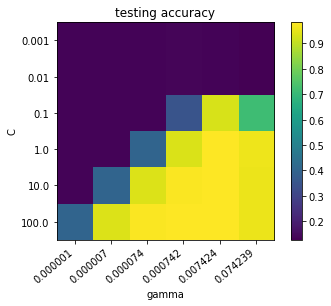

In [7]:
plt.title("testing accuracy")
plt.imshow(results.mean_test_score.values.reshape(6, 6))
plt.yticks(range(len(param_grid['svc__C'])), param_grid['svc__C'])
plt.ylabel("C")
plt.xticks(range(len(param_grid['svc__gamma'])), ["{:.6f}".format(g) for g in param_grid['svc__gamma']], rotation=40, ha="right")
plt.xlabel("gamma")
plt.colorbar()

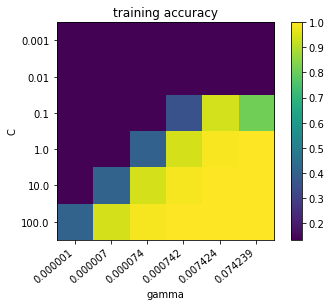

In [8]:
plt.title("training accuracy")
plt.imshow(results.mean_train_score.values.reshape(6, 6))
plt.yticks(range(len(param_grid['svc__C'])), param_grid['svc__C'])
plt.ylabel("C")
plt.xticks(range(len(param_grid['svc__gamma'])), ["{:.6f}".format(g) for g in param_grid['svc__gamma']], rotation=40, ha="right")
plt.xlabel("gamma")
plt.colorbar()